LEVEL-2
Idea: Unveiling the Android App Market: Analyzing Google Play Store Data

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('apps.csv')

# Display the first few rows
print(df.head())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values (example: filling with median for numerical columns, mode for categorical columns)
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Current Ver'].fillna('Unknown', inplace=True)
df['Android Ver'].fillna('Unknown', inplace=True)

# Ensure correct data types
df['Reviews'] = df['Reviews'].astype(int)
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if isinstance(x, str) else x).astype(float)
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if isinstance(x, str) else x).astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display the updated dataframe
print(df.head())



Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free    0.0   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free    0.0   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Fre

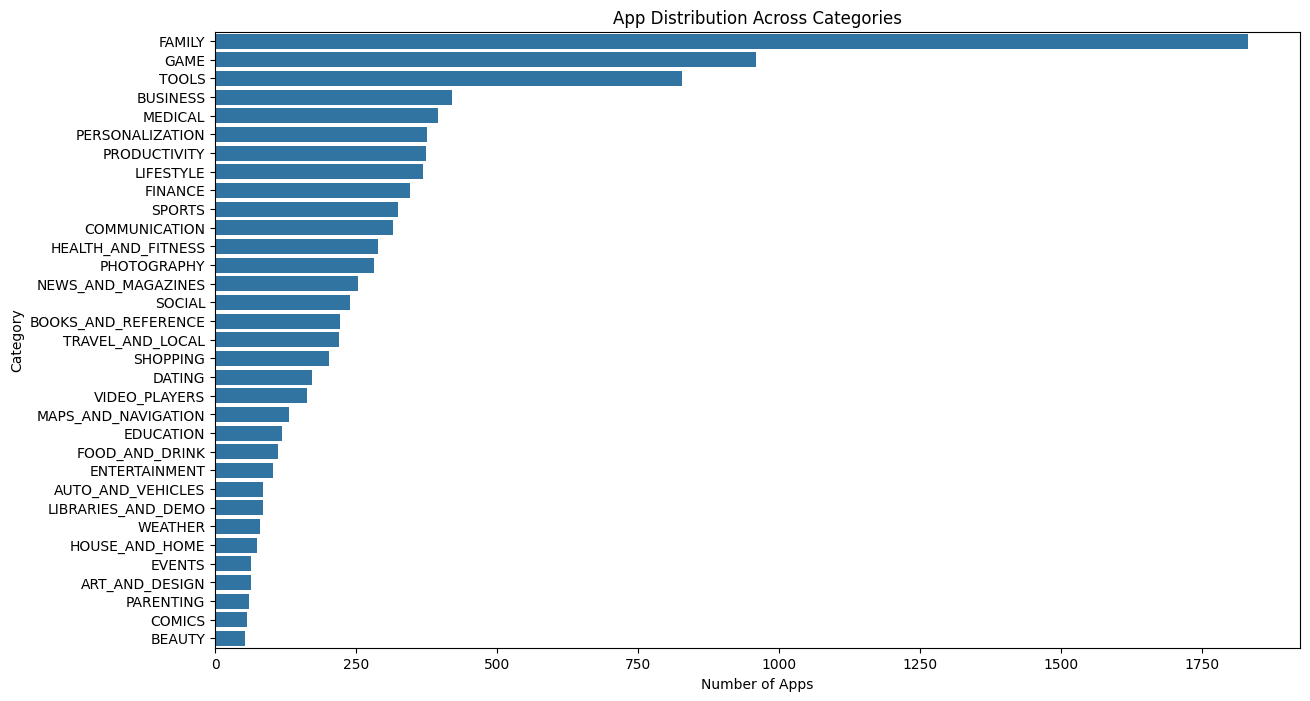

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of apps across categories
plt.figure(figsize=(14, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


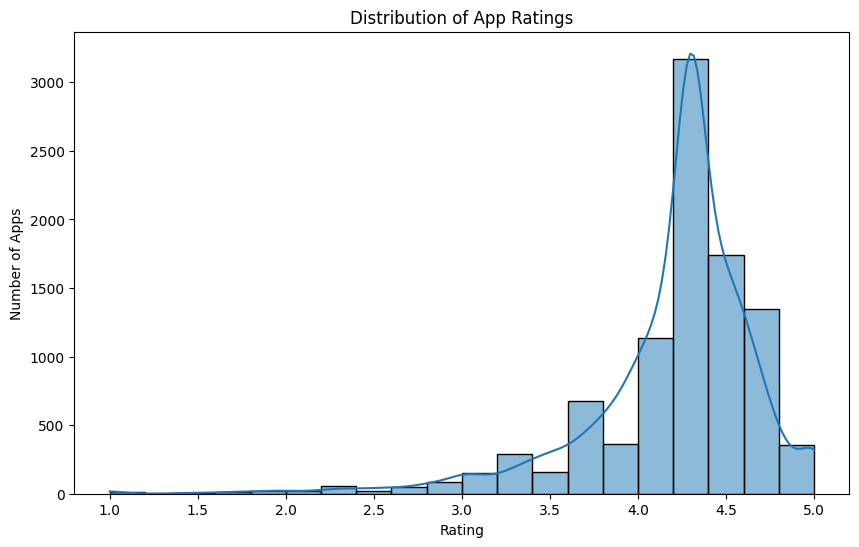

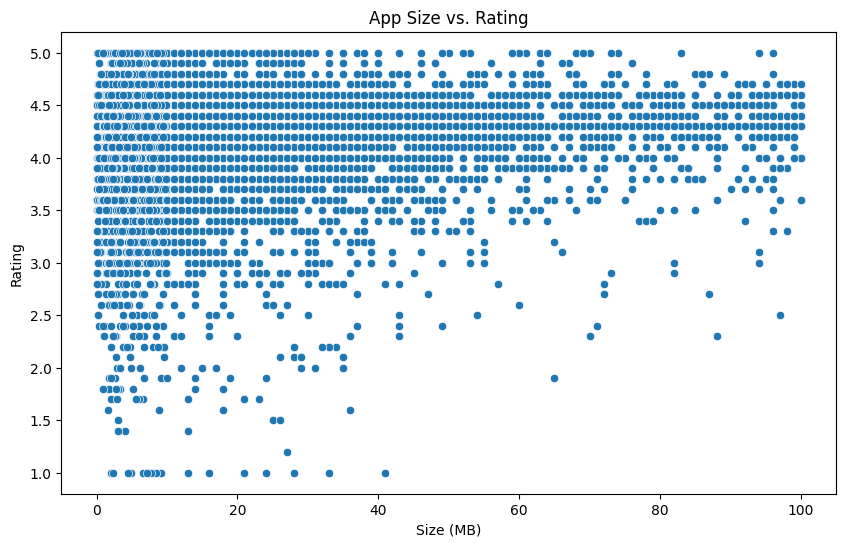

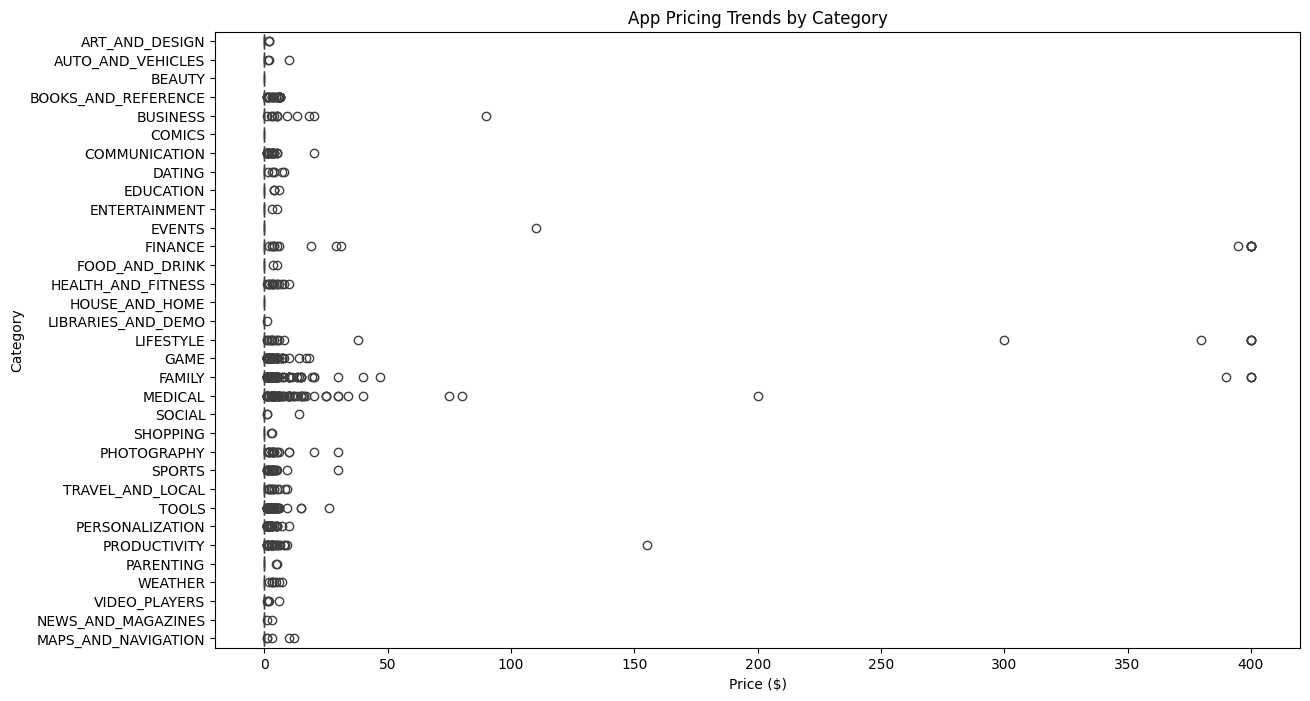

In [7]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

# Scatter plot of Size vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Box plot of Price by Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price', y='Category', data=df)
plt.title('App Pricing Trends by Category')
plt.xlabel('Price ($)')
plt.ylabel('Category')
plt.show()


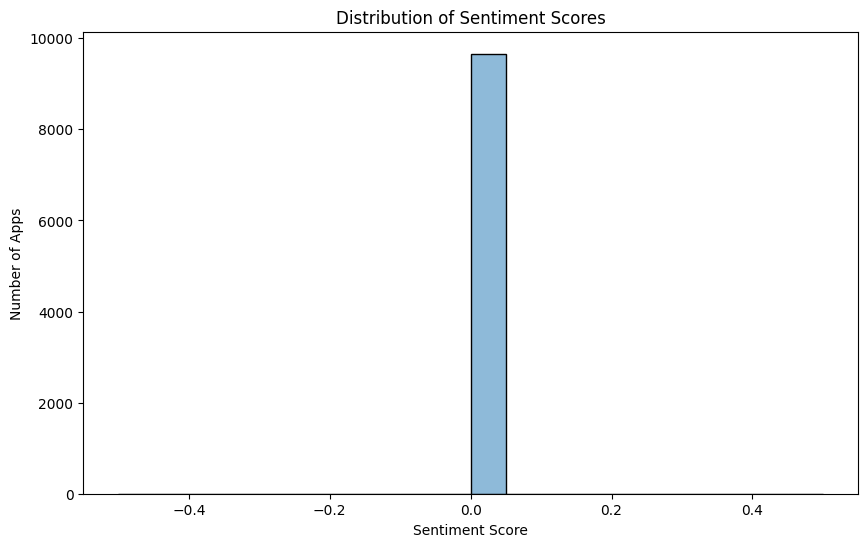

In [8]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply sentiment analysis on Reviews
df['Sentiment'] = df['Reviews'].apply(lambda x: get_sentiment(str(x)))

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Apps')
plt.show()


In [11]:
import plotly.express as px

# Interactive scatter plot of Size vs. Rating with hover data
fig = px.scatter(df, x='Size', y='Rating', color='Category', hover_data=['App', 'Installs'])
fig.update_layout(title='Interactive Scatter Plot of App Size vs. Rating')
fig.show()

import plotly.express as px

# Interactive bar chart of app distribution across categories
fig = px.bar(df['Category'].value_counts().reset_index(), x='Category', y='count', labels={'Category': 'Category', 'count': 'Number of Apps'}) # Use 'Category' for x and 'count' for y
fig.update_layout(title='Interactive Bar Chart of App Distribution Across Categories')
fig.show()
